# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Import Dataset

In [2]:
dataset = pd.read_csv('diamonds.csv')
dataset = dataset.iloc[:,1:]
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Preprocessing

In [4]:
encoder = OrdinalEncoder()
encoder.fit(dataset[['cut', 'color', 'clarity']])

OrdinalEncoder()

In [5]:
dataset[['cut', 'color', 'clarity']] = encoder.transform(dataset[['cut', 'color', 'clarity']])
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2.0,1.0,3.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,1.0,2.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1.0,1.0,4.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3.0,5.0,5.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,6.0,3.0,63.3,58.0,335,4.34,4.35,2.75


# Find Input & Output Columns

In [6]:
Y = dataset['price']
X = dataset.drop('price', axis=1)

In [7]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2.0,1.0,3.0,61.5,55.0,3.95,3.98,2.43
1,0.21,3.0,1.0,2.0,59.8,61.0,3.89,3.84,2.31
2,0.23,1.0,1.0,4.0,56.9,65.0,4.05,4.07,2.31
3,0.29,3.0,5.0,5.0,62.4,58.0,4.20,4.23,2.63
4,0.31,1.0,6.0,3.0,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2.0,0.0,2.0,60.8,57.0,5.75,5.76,3.50
53936,0.72,1.0,0.0,2.0,63.1,55.0,5.69,5.75,3.61
53937,0.70,4.0,0.0,2.0,62.8,60.0,5.66,5.68,3.56
53938,0.86,3.0,4.0,3.0,61.0,58.0,6.15,6.12,3.74


In [8]:
Y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

# Train Test Split

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, random_state=42, test_size=0.2)

# Scaling

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Multi Collinearity Detection

In [11]:
dataset = pd.DataFrame(X_train, columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'])
dataset['price'] = Y_train

In [12]:
dataset

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.560056,-1.514513,-0.347949,-0.483504,-2.550748,2.933861,2.229450,2.138209,1.738207,326.0
1,0.447392,1.406739,-0.936621,-0.483504,-1.220426,1.139575,0.747550,0.656710,0.537733,326.0
2,0.637532,0.432989,0.829396,0.675971,0.529996,0.242432,0.765404,0.700284,0.791951,327.0
3,1.482597,-1.514513,-0.936621,-0.483504,-0.170173,3.382432,1.318885,1.249310,1.243894,334.0
4,1.524851,1.406739,0.240724,0.096233,0.249928,-0.206140,1.372448,1.380030,1.399249,NaN
...,...,...,...,...,...,...,...,...,...,...
43147,0.531899,1.406739,1.418069,0.675971,0.459979,0.691003,0.667206,0.674140,0.721335,1389.0
43148,-0.693447,-0.540762,-1.525294,0.096233,-0.520257,-1.103283,-0.627225,-0.633065,-0.676864,1389.0
43149,-0.989219,1.406739,-0.347949,-1.642980,-1.010376,0.242432,-1.109289,-1.112374,-1.185299,1389.0
43150,0.214999,0.432989,2.006742,-1.063242,0.740047,0.691003,0.354757,0.255834,0.396501,1389.0


# Visualize HeatMap

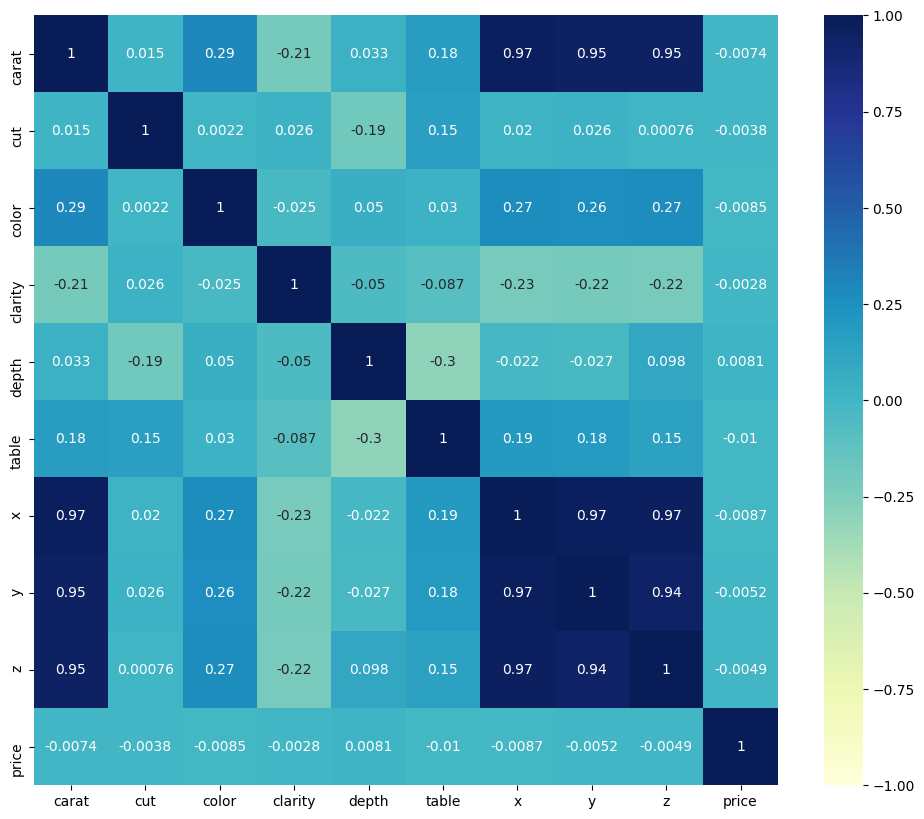

In [13]:
corr = dataset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.show()

From the heatmap, it can be seen that x,y,z are highly correlated with each other (>0.9).<br>
Therefore, the data has multicollinearity.<br>
Removed by,
- Drop (Information Loss)
- PCA

# PCA

In [14]:
pca = PCA(n_components=X_train.shape[1])
pca_data = pca.fit_transform(X_train)

percent_var_explained = pca.explained_variance_ / (np.sum(pca.explained_variance_))
cum_var_explained = np.cumsum(percent_var_explained)

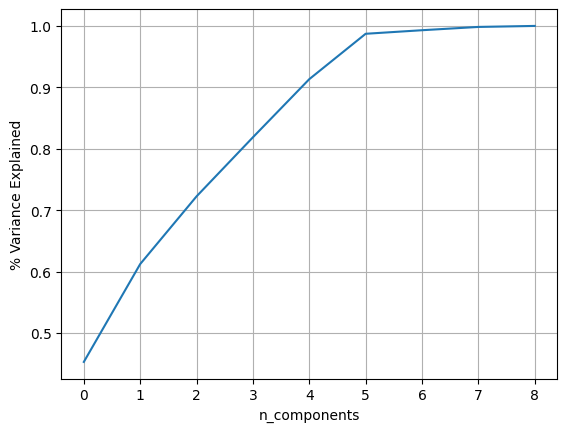

In [15]:
plt.plot(cum_var_explained)
plt.xlabel('n_components')
plt.ylabel('% Variance Explained')
plt.grid()
plt.show()

It can be seen after n_components =6 there is no % variance explained increase.<br>
So, n_components =6

In [16]:
cum_var_explained

array([0.45309629, 0.61238591, 0.72257108, 0.81871501, 0.91333328,
       0.98720681, 0.99300439, 0.99835681, 1.        ])

Also, cum_var_explained has only first 6 values with steep increase.

In [17]:
pca.explained_variance_

array([4.07796108, 1.4336398 , 0.99168959, 0.8653154 , 0.85158419,
       0.66487711, 0.05217951, 0.04817287, 0.01478904])

Also , It can be seen only first 6 has significant values

In [18]:
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)

# Visualize Heatmap Again

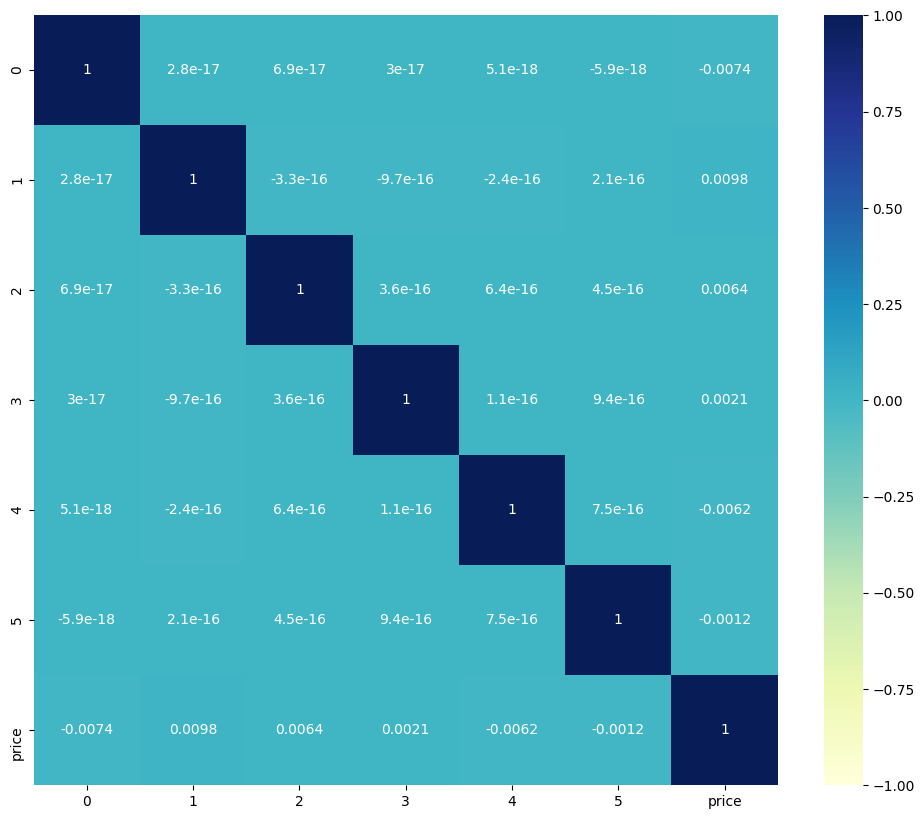

In [19]:
dataset = pd.DataFrame(X_train)
dataset['price'] = Y_train

corr = dataset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.show()

Now, Multi Collinearity is reduced